# Loan Prediction

#### Column Description
* **Loan_ID** -	Unique Loan ID
* **Gender** -	Male/ Female
* **Married** -	Applicant married (Y/N)
* **Dependents** -	Number of dependents
* **Education** -	Applicant Education (Graduate/ Under Graduate)
* **Self_Employed** -	Self employed (Y/N)
* **ApplicantIncome** -	Applicant income
* **CoapplicantIncome** -	Coapplicant income
* **LoanAmount** -	Loan amount in thousands
* **Loan_Amount_Term** -	Term of loan in months
* **Credit_History** -	credit history meets guidelines
* **Property_Area** -	Urban/ Semi Urban/ Rural
* **Loan_Status** -	(Target) Loan approved (Y/N)


## Set Up

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('./data/train.csv')
print(train.shape)
train.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
test = pd.read_csv('./data/test.csv')
print(test.shape)
test.head()

(367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


## Examining the Data

In [3]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
# Unique text values per column
obj_cols = list(train.columns[train.dtypes=='object'])
obj_cols.remove('Loan_ID')
obj_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [5]:
# Unique values of each column with 'object' data types
# Will help determine how to preprocess them into number data types
for col in obj_cols:
    print(f"{col}:")
    print(f"{train[col].unique()}\n")

Gender:
['Male' 'Female' nan]

Married:
['No' 'Yes' nan]

Dependents:
['0' '1' '2' '3+' nan]

Education:
['Graduate' 'Not Graduate']

Self_Employed:
['No' 'Yes' nan]

Property_Area:
['Urban' 'Rural' 'Semiurban']

Loan_Status:
['Y' 'N']



## Preprocessing Columns & Values

In [6]:
# Collect all the columns with 'object' data types (except Loan ID) for preprocessing
obj_cols = [col for col in train.columns[train.dtypes=='object']]
obj_cols.remove('Loan_ID')
obj_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [7]:
# Binary Encoding the following columns:
# (Generally 0 means 'no' or implies negation, while 1 the opposite)

# Gender
train.loc[(train.Gender == 'Male')|(train.Gender.isnull()), 'Gender'] = 0
train.loc[train.Gender == 'Female', 'Gender'] = 1
train.Gender = train.Gender.astype(float)
print(train.shape)

# Married
train.loc[train.Married == 'No', 'Married'] = 0
train.loc[(train.Married == 'Yes')|(train.Married.isnull()), 'Married'] = 1
train.Married = train.Married.astype(float)
print(train.shape)

# Dependents
# Creat a new column called 'has_child'
train['has_child'] = 1
train.loc[(train.Dependents.isnull())|(train.Dependents=='0'),'has_child'] = 0
train.drop('Dependents', axis=1, inplace=True)

# Education
train['graduate'] = 1
train.loc[(train.Education.isnull())|(train.Education=='Not Graduate'),'graduate'] = 0
train.drop('Education', axis=1, inplace=True)

# Self_Employed
train.loc[(train.Self_Employed == 'No')|(train.Self_Employed.isnull()), 'Self_Employed'] = 0
train.loc[train.Self_Employed == 'Yes', 'Self_Employed'] = 1
train.Self_Employed = train.Self_Employed.astype(float)
print(train.shape)

# Loan_Status
train.loc[train.Loan_Status == 'N', 'Loan_Status'] = 0
train.loc[(train.Loan_Status == 'Y')|(train.Loan_Status.isnull()), 'Loan_Status'] = 1
print(train.shape)

# Credit_History
train.loc[train.Credit_History.isnull(), 'Credit_History'] = 1
train.Credit_History = train.Credit_History.astype(float)
print(train.shape)

(614, 13)
(614, 13)
(614, 13)
(614, 13)
(614, 13)


In [8]:
from sklearn.preprocessing import LabelBinarizer
binarizer = LabelBinarizer()

# Property_Area
train.Property_Area = train.Property_Area.astype(str)
results = binarizer.fit_transform(train.Property_Area)
property_area_encoded = pd.DataFrame(results, columns=binarizer.classes_)
print(train.shape)

train = pd.concat([train, property_area_encoded], axis=1, sort=False)
train.drop('Property_Area', axis=1, inplace=True)

train.head()

(614, 13)


,Loan_ID,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,has_child,graduate,Rural,Semiurban,Urban
0,LP001002,0.0,0.0,0.0,5849,0.0,NaN,360.0,1.0,1,0,1,0,0,1
1,LP001003,0.0,1.0,0.0,4583,1508.0,128.0,360.0,1.0,0,1,1,1,0,0
2,LP001005,0.0,1.0,1.0,3000,0.0,66.0,360.0,1.0,1,0,1,0,0,1
3,LP001006,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,1,0,0,0,0,1
4,LP001008,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,1,0,1,0,0,1


In [9]:
# encoding test data

# Gender
test.loc[(test.Gender == 'Male')|(test.Gender.isnull()), 'Gender'] = 0
test.loc[test.Gender == 'Female', 'Gender'] = 1
test.Gender = test.Gender.astype(float)
print(test.shape)

# Married
test.loc[test.Married == 'No', 'Married'] = 0
test.loc[(test.Married == 'Yes')|(test.Married.isnull()), 'Married'] = 1
test.Married = test.Married.astype(float)
print(test.shape)

# Dependents
# Creat a new column called 'has_child'
test['has_child'] = 1
test.loc[(test.Dependents.isnull())|(test.Dependents=='0'),'has_child'] = 0
test.drop('Dependents', axis=1, inplace=True)

# Education
test['graduate'] = 1
test.loc[(test.Education.isnull())|(test.Education=='Not Graduate'),'graduate'] = 0
test.drop('Education', axis=1, inplace=True)

# Self_Employed
test.loc[(test.Self_Employed == 'No')|(test.Self_Employed.isnull()), 'Self_Employed'] = 0
test.loc[test.Self_Employed == 'Yes', 'Self_Employed'] = 1
test.Self_Employed = test.Self_Employed.astype(float)
print(test.shape)

# Credit_History
test.loc[test.Credit_History.isnull(), 'Credit_History'] = 1
test.Credit_History = test.Credit_History.astype(float)
print(test.shape)

# Property_Area
test.Property_Area = test.Property_Area.astype(str)
results = binarizer.fit_transform(test.Property_Area)
property_area_encoded = pd.DataFrame(results, columns=binarizer.classes_)
print(test.shape)

test = pd.concat([test, property_area_encoded], axis=1, sort=False)
test.drop('Property_Area', axis=1, inplace=True)

test.head()

(367, 12)
(367, 12)
(367, 12)
(367, 12)
(367, 12)


,Loan_ID,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,has_child,graduate,Rural,Semiurban,Urban
0,LP001015,0.0,1.0,0.0,5720,0,110.0,360.0,1.0,0,1,0,0,1
1,LP001022,0.0,1.0,0.0,3076,1500,126.0,360.0,1.0,1,1,0,0,1
2,LP001031,0.0,1.0,0.0,5000,1800,208.0,360.0,1.0,1,1,0,0,1
3,LP001035,0.0,1.0,0.0,2340,2546,100.0,360.0,1.0,1,1,0,0,1
4,LP001051,0.0,0.0,0.0,3276,0,78.0,360.0,1.0,0,0,0,0,1


In [10]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Loan_Status           0
has_child             0
graduate              0
Rural                 0
Semiurban             0
Urban                 0
dtype: int64

In [11]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
has_child            0
graduate             0
Rural                0
Semiurban            0
Urban                0
dtype: int64

In [12]:
from sklearn.impute import SimpleImputer

X_train = train.iloc[:,1:-1]
y_train = train['Loan_Status']
X_test = test.iloc[:,1:]

# imputation
imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(imputer.fit_transform(X_train))
imputed_X_test = pd.DataFrame(imputer.transform(X_test))

imputed_X_train.columns = X_train.columns
imputed_X_test.columns = X_test.columns

print(imputed_X_train.isnull().sum())
imputed_X_train.head()

Gender               0
Married              0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
has_child            0
graduate             0
Rural                0
Semiurban            0
dtype: int64


,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,has_child,graduate,Rural,Semiurban
0,0.0,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,1.0,1.0,1.0,0.0
2,0.0,1.0,1.0,3000.0,0.0,66.000000,360.0,1.0,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,1.0,0.0,1.0,0.0,0.0


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor(n_estimators = 10, random_state=77)
model.fit(imputed_X_train, y_train)
prediction = model.predict(imputed_X_test)
prediction

array([0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 0.

In [14]:
submission = pd.read_csv("./data/sample_submission.csv", index_col='Loan_ID')
print(submission.shape)
submission.head()

(367, 1)


,Loan_Status
Loan_ID,
LP001015,N
LP001022,N
LP001031,N
LP001035,N
LP001051,N


In [15]:
submission['Loan_Status'] = prediction
submission.loc[submission.Loan_Status==0,'Loan_Status'] = 'N'
submission.loc[submission.Loan_Status==1,'Loan_Status'] = 'Y'
submission.head()

,Loan_Status
Loan_ID,
LP001015,N
LP001022,Y
LP001031,Y
LP001035,Y
LP001051,N


In [16]:
submission.to_csv("./2020.08.29_loan-prediction.csv")

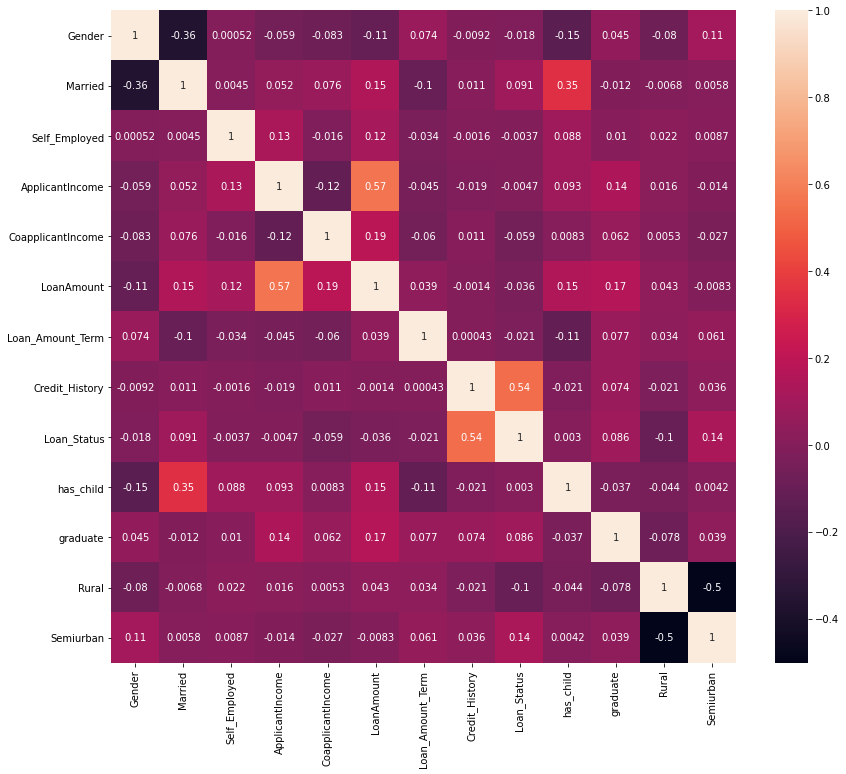

In [20]:
corr = imputed_X_train.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr, annot=True)

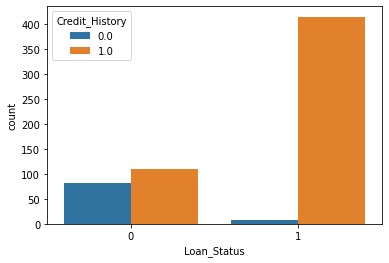

In [21]:
sns.countplot(data=train, x='Loan_Status', hue='Credit_History')